*********************************Stacking using SVM and MLP***********************************
Accuracy: 0.868575624082232


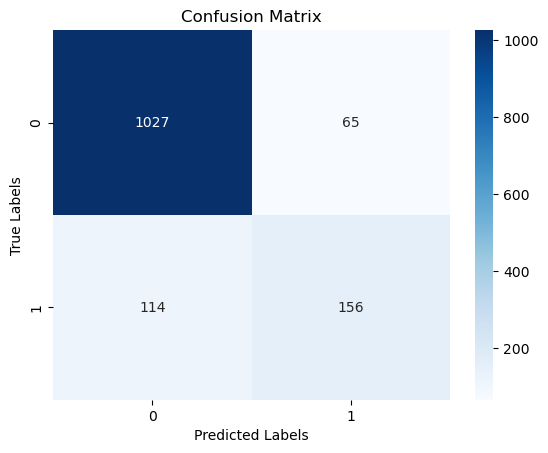

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1092
         1.0       0.71      0.58      0.64       270

    accuracy                           0.87      1362
   macro avg       0.80      0.76      0.78      1362
weighted avg       0.86      0.87      0.86      1362

Area under the curve: 0.8719712386379053


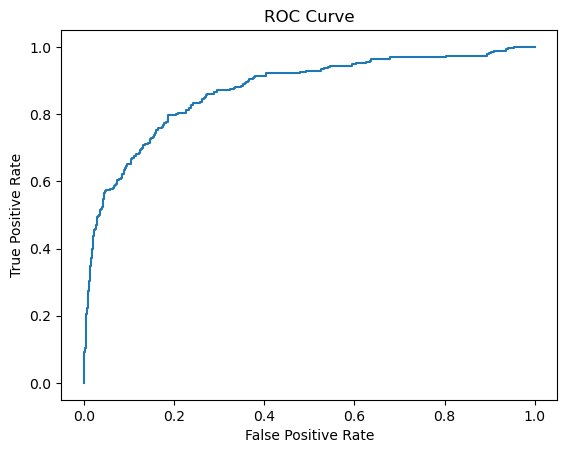

*********************************Randomforest***********************************
Accuracy: 0.8986784140969163


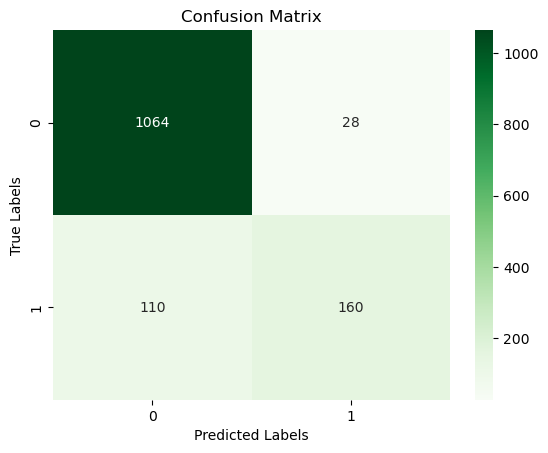

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1092
         1.0       0.85      0.59      0.70       270

    accuracy                           0.90      1362
   macro avg       0.88      0.78      0.82      1362
weighted avg       0.90      0.90      0.89      1362

Area under the curve: 0.9244301994301994


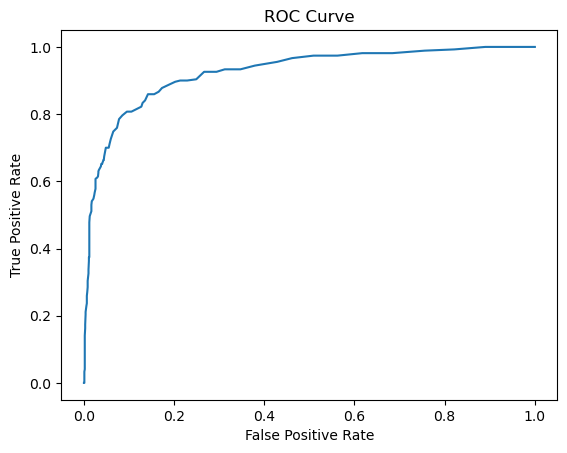

*********************************AdaboostClassifier***********************************
Accuracy: 0.8443465491923642


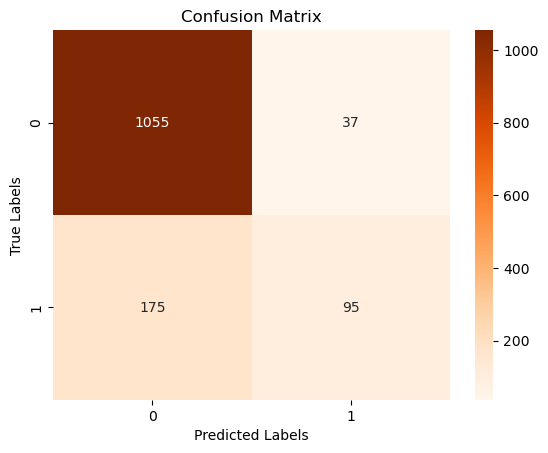

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1092
         1.0       0.72      0.35      0.47       270

    accuracy                           0.84      1362
   macro avg       0.79      0.66      0.69      1362
weighted avg       0.83      0.84      0.82      1362

Area under the curve: 0.8235076651743318


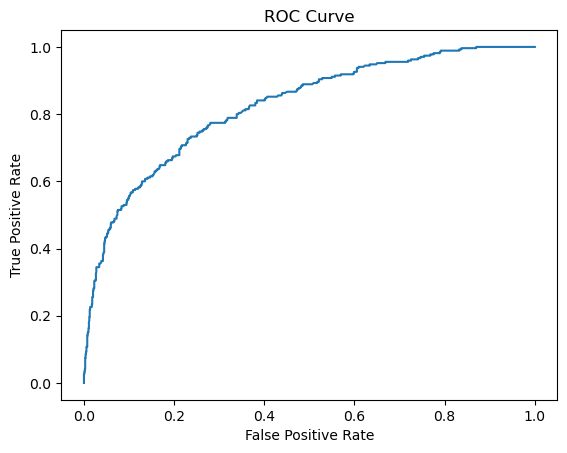

**********************************ANN Classifier**********************************
Epoch 1/30
171/171 [==============================] - 2s 2ms/step - loss: 0.4883 - accuracy: 0.8077
Epoch 2/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8222
Epoch 3/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8329
Epoch 4/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8378
Epoch 5/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8388
Epoch 6/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8406
Epoch 7/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8426
Epoch 8/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8419
Epoch 9/30
171/171 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8437
Epoch 10/30
171/1

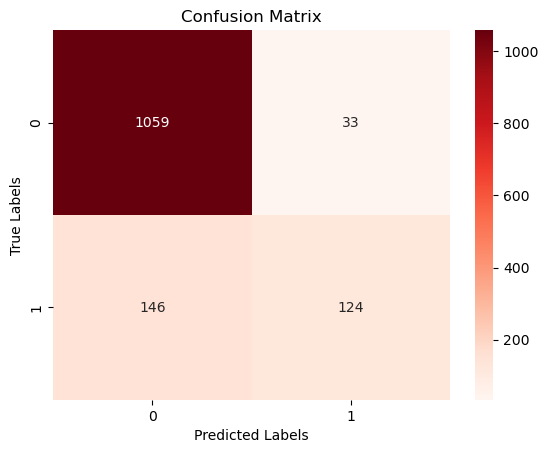

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1092
         1.0       0.79      0.46      0.58       270

    accuracy                           0.87      1362
   macro avg       0.83      0.71      0.75      1362
weighted avg       0.86      0.87      0.85      1362

Area under the curve: 0.8267534934201601


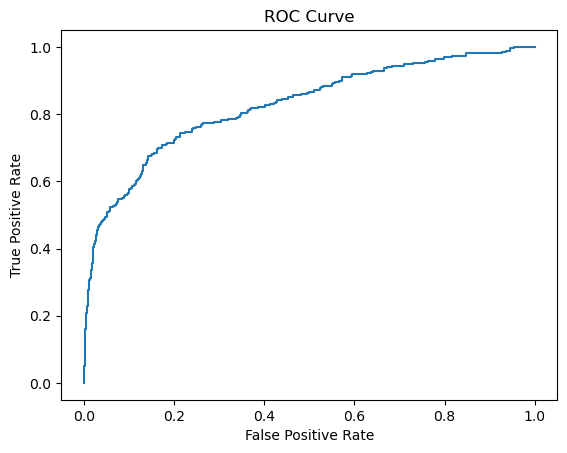

In [1]:
import numpy as n
import pandas as p
from sklearn.model_selection import train_test_split as ts
from sklearn.svm import SVC as sv
from sklearn.neural_network import MLPClassifier as mc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler as ss
from sklearn.impute import SimpleImputer as si
from sklearn.decomposition import PCA as pc
from sklearn.ensemble import StackingClassifier as sc
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import roc_curve as rc
import matplotlib.pyplot as pl
import seaborn as SNS
from sklearn.ensemble import RandomForestClassifier as ranfc
from sklearn.ensemble import AdaBoostClassifier as abc
import tensorflow as tfl
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as den

# Load the dataset
dat = p.read_csv("sepsis-6800.csv")
im = si(missing_values=n.nan, strategy='mean')
dat = im.fit_transform(dat)

# Split the dataset into features and target
a = dat[:, 2:41]
b = dat[:, 41]

# Apply PCA to reduce the number of features
prin= pc(n_components=10)
a = prin.fit_transform(a)

# Split the dataset into training and testing sets
atd, atsd, btd, btsd = ts(a, b, test_size=0.2, random_state=42)

# Scale the data
sca = ss()
atd = sca.fit_transform(atd)
atsd = sca.transform(atsd)

# Create an SVM classifier and an ANN classifier
svc = sv(kernel='linear', C=1, random_state=42)
nn = mc(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
est = [('svc', svc), ('nn', nn)]
clf = sc(estimators=est, final_estimator=mc(), cv=5)

# Fit the model
clf.fit(atd, btd)
print("*********************************Stacking using SVM and MLP***********************************")

# Evaluate the model
bpred = clf.predict(atsd)
bprob = clf.predict_proba(atsd)[:, 1]
fpr, tpr, thresholds = rc(btsd, bprob)
print("Accuracy:", accuracy_score(btsd, bpred))
cm = confusion_matrix(btsd, bpred)
# Convert confusion matrix to pictorial representation (heatmap)
SNS.heatmap(cm, annot=True, cmap="Blues", fmt="d")
pl.xlabel("Predicted Labels")
pl.ylabel("True Labels")
pl.title("Confusion Matrix")
pl.show()
print(bpred)
print(classification_report(btsd,bpred))
auc = ras(btsd, bprob)

print("Area under the curve:", auc)
pl.plot(fpr, tpr)
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.show()

print("*********************************Randomforest***********************************")

rfcl = ranfc(n_estimators=100, random_state=42)
rfcl.fit(atd, btd)
bpred = rfcl.predict(atsd)
bprob = rfcl.predict_proba(atsd)[:, 1]
fpr, tpr, thresholds = rc(btsd, bprob)
print("Accuracy:", accuracy_score(btsd, bpred))
cm = confusion_matrix(btsd, bpred)
# Convert confusion matrix to pictorial representation (heatmap)
SNS.heatmap(cm, annot=True, cmap="Greens", fmt="d")
pl.xlabel("Predicted Labels")
pl.ylabel("True Labels")
pl.title("Confusion Matrix")
pl.show()
print(bpred)
print(classification_report(btsd,bpred))
auc = ras(btsd, bprob)

print("Area under the curve:", auc)
pl.plot(fpr, tpr)
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.show()


print("*********************************AdaboostClassifier***********************************")

rfcl = abc(n_estimators=100, random_state=42)
rfcl.fit(atd, btd)
bpred = rfcl.predict(atsd)
bprob = rfcl.predict_proba(atsd)[:, 1]
fpr, tpr, thresholds = rc(btsd, bprob)
print("Accuracy:", accuracy_score(btsd, bpred))
cm = confusion_matrix(btsd, bpred)
# Convert confusion matrix to pictorial representation (heatmap)
SNS.heatmap(cm, annot=True, cmap="Oranges", fmt="d")
pl.xlabel("Predicted Labels")
pl.ylabel("True Labels")
pl.title("Confusion Matrix")
pl.show()
print(bpred)
print(classification_report(btsd,bpred))
auc = ras(btsd, bprob)

print("Area under the curve:", auc)
pl.plot(fpr, tpr)
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.show()



print("**********************************ANN Classifier**********************************")
mo = sql()
mo.add(den(64, activation='relu', input_shape=(atd.shape[1],)))
mo.add(den(64, activation='relu'))
mo.add(den(1, activation='sigmoid'))
mo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mo.fit(atd,btd, epochs=30, batch_size=32, verbose=1)
los, accur = mo.evaluate(atsd, btsd)
print("Accuracy:", accur)
bprob = mo.predict(atsd)

# Convert probabilities to class labels
bpred = n.round(bprob).flatten()
fpr, tpr, thresholds = rc(btsd, bprob)

cm = confusion_matrix(btsd, bpred)
# Convert confusion matrix to pictorial representation (heatmap)
SNS.heatmap(cm, annot=True, cmap="Reds", fmt="d")
pl.xlabel("Predicted Labels")
pl.ylabel("True Labels")
pl.title("Confusion Matrix")
pl.show()
print(bpred)
print(classification_report(btsd,bpred))
auc = ras(btsd, bprob)

print("Area under the curve:", auc)
pl.plot(fpr, tpr)
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.show()





